# Wine Quality 

Quality를 분류하는 것이 목표 입니다. 
평가 Metric 은 Classification Accuracy 가 되겠습니다. 
이번에는 특별히 Null 값에 대한 전처리가 필요하지 않기에, 더욱이 모델에 대한 공부와 모델 Hyperparmeter Tunning 등을 연습해보면 좋을 것 같습니다.

## Import package

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler


# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
# Load Data as 
df_train = pd.read_csv('../../../input/wine_quality/data/train.csv')
df_test = pd.read_csv('../../../input/wine_quality/data/test.csv')
df_combine = [df_train, df_test]

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


## EDA

In [5]:
from pandas_profiling import ProfileReport

In [6]:
# train_profile = df_train.profile_report()

## PreProcessing

In [7]:
for df_data in df_combine:
    df_data.loc[df_data['type'] == 'white', 'type'] = 0
    df_data.loc[df_data['type'] == 'red', 'type'] = 1
    df_data['type'] = df_data['type'].astype('category')

## Prediction by Model

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_data = df_train.drop(['index','quality'], axis=1)

In [10]:
train_label = df_train["quality"]

In [11]:
x_train, x_valid, y_train, y_valid = train_test_split(train_data, train_label, test_size=0.2, random_state=156)

In [12]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
3418,7.9,0.29,0.36,11.1,0.033,43.0,208.0,0.99690,3.14,0.46,10.3,0
1417,5.6,0.28,0.40,6.1,0.034,36.0,118.0,0.99144,3.21,0.43,12.1,0
4165,7.2,0.31,0.50,13.3,0.056,68.0,195.0,0.99820,3.01,0.47,9.2,0
3201,7.0,0.48,0.12,4.5,0.050,23.0,86.0,0.99398,2.86,0.35,9.0,0
1160,6.5,0.24,0.32,7.6,0.038,48.0,203.0,0.99580,3.45,0.54,9.7,0


In [13]:
x_valid.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
966,6.6,0.33,0.40,2.65,0.041,35.0,86.0,0.98916,3.11,0.39,13.3,0
4972,6.9,0.25,0.35,9.20,0.034,42.0,150.0,0.99470,3.21,0.36,11.5,0
355,6.9,0.36,0.28,13.55,0.048,51.0,189.0,0.99782,3.00,0.60,9.5,0
5294,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,0
2480,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,0


In [14]:
test_data = df_test.drop(['index'], axis=1)

In [15]:
test_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,1
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0


In [16]:
def predict_by_model(model):
    prediction = model.predict(test_data)
    train_accuracy = round(model.score(x_train,y_train) * 100, 2)
    print("Train accuracy:", train_accuracy, "%")
    valid_accuracy = round(model.score(x_valid,y_valid) * 100, 2)
    print("Valid accuracy:", valid_accuracy, "%")
    return prediction

In [17]:
from lightgbm import LGBMClassifier

#### LightGBM

- 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉬움 (일반적으로 10,000건 이하의 데이터 세트 정도 <-- LightGBM 공식 문서에 기술되어 있음)
- 리프 중심 트리 분할 (Leaf Wise) 방식
    - 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성됨


HyperParameters  

- num_iterations : 반복 수행하려는 트리의 개수를 지정. 너무 크게 지정하면 과적합됨    
- learning_rate : 0~1. 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값.  
- max_depth : Depth wise 방식의 트리와 다르게 Leaf wise 기반이므로 깊이가 상대적으로 더 깊음.  
- min_data_in_leaf : 
- num_leaves : 최대 리프 개수   
- boosting : 부스팅의 트리를 생성하는 알고리즘을 기술  
    - gbdt: 일반적인 그래디언트 부스팅 결정 트리  
    - rf: 랜덤포레스트  
- bagging_fraction : 과적합 제어하기 위해 테이터를 샘플링하는 비율을 지정  
- lambda_l2 : L2 regulation 제어. 값이 클수록 과적합 감소 효과 있음  
- lambda_l1 : L1 regulation 제어. 

In [23]:
# lgbm_wrapper = LGBMClassifier(n_estimators=500, learning_rate=0.05, application='multiclass', min_data_in_leaf=30, max_depth=15, lambda_l1=0.3, lambda_l2=0.7)
lgbm_wrapper = LGBMClassifier(n_estimators=500, learning_rate=0.05, application='multiclass', min_data_in_leaf=30, max_depth=15)
lgbm_wrapper.fit(x_train, y_train, early_stopping_rounds=50, eval_metric='multi_logloss', eval_set=[(x_train,y_train),(x_valid,y_valid)], verbose=True)

lgbm_pred = predict_by_model(lgbm_wrapper)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0.3, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3
[LightGBM] [Warning] lambda_l2 is set=0.7, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7
[1]	training's multi_logloss: 1.23614	valid_1's multi_logloss: 1.23776
[2]	training's multi_logloss: 1.20259	valid_1's multi_logloss: 1.21578
[3]	training's multi_logloss: 1.17333	valid_1's multi_logloss: 1.19605
[4]	training's multi_logloss: 1.1466	valid_1's multi_logloss: 1.17754
[5]	training's multi_logloss: 1.12238	valid_1's multi_logloss: 1.16138
[6]	training's multi_logloss: 1.09992	valid_1's multi_logloss: 1.14839
[7]	training's multi_logloss: 1.07883	valid_1's multi_logloss: 1.13474
[8]	training's multi_logloss: 1.0588	valid_1's multi_logloss: 1.12253
[9]	training's multi_logloss: 1.03973	valid_1's multi_logloss: 1.11152
[10]	training's multi_logloss: 1.0

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

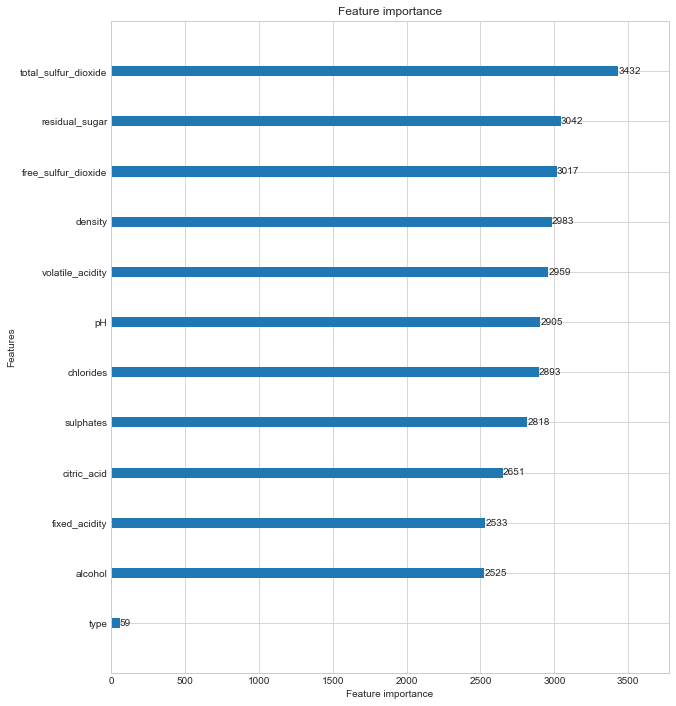

In [19]:
from lightgbm import plot_importance

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)

## Submission

In [20]:
# Final prediction
predictions = lgbm_pred
predictions_df = pd.DataFrame(predictions)

submission = pd.concat([df_test['index'], predictions_df], axis = 'columns')

submission.columns = ["index", "quality"]
submission.to_csv('wine_quality.csv', header=True, index=False)